# Tecnología aplicada a la música de tradición oral (bloque 3)
### Demostración 3. Exploración “en vivo” de un jupyter notebook

Partes del flujo de trabajo

1. Cargar una melodía de libre elección.
2. Visualizar la estructura de datos subyacente y renderizarla
3. Filtrar notas, duraciones e intervalos
4. Procesos de extracción de información analítica (*feature extraction*):
> * Histograma de intervalos
> * Histograma de alturas
> * Histograma de duraciones
> * Armadura
> * Rango
> * Altura inicial y final
> * Altura mediana
> * Altura más repetida
> * Altura menos repetida
5. Visualización gráfica:
> * Densidad de notas por compás
> * Progress bar de alturas

In [27]:
### este código debe ejecutarse obligatoriamente para que el resto funcione. 
## Su cometido es cargar el software que nutre este entorno informático.
from music21 import *
import os
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
from melodic import ambito, armadura, get_counter_stats, rec_notas, note_rest_ratio
from visualization import activityPlot, activityHeatMap, melodicContour

### 1. Cargar una melodía de libre elección

In [2]:
valor = widgets.ToggleButtons(
    options=['40', '60'],
    description='Seleccionar repertorio según una década:',
    value='40'  # Valor por defecto
)

carpeta = widgets.Label(value=f'Seleccionado: {valor.value}')

def actualizar_carpeta(*args):
    carpeta.value = f'Seleccionado: {valor.value}'

valor.observe(actualizar_carpeta, 'value')

display(valor, carpeta)


ToggleButtons(description='Seleccionar repertorio según una década:', options=('40', '60'), value='40')

Label(value='Seleccionado: 40')

In [3]:
## IMPRIMIR LA LISTA DE ARCHIVOS DE DICHA CARPETA
folder = str(carpeta.value).split()[-1]
mels = os.listdir(folder + '/')

for i in mels:
    print(i)
    

GR_Cuna_M22-018.krn
GR_Cuna_M22-099.krn
GR_Cuna_M22-150.krn
GR_Cuna_M22-169_long.krn
GR_Cuna_M22-177.krn
GR_Cuna_M24-329.krn
GR_Cuna_M24-332.krn


In [4]:
### MODIFICA EL NOMBRE DE ARCHIVO DE ESTE CÓDIGO Y EJECÚTALO CON PLAY O SHIFT + ENTER

try:
    s = converter.parse(folder + '/' + 'GR_Cuna_M22-018.krn')
    print('La partitura se ha cargado correctamente')
except:
    print('Glups! algo debe haber ido mal. Revisa el nombre del archivo.')

La partitura se ha cargado correctamente


### 2. Visualizar la estructura de datos subyacente y renderizar la partitura

In [5]:
### MOSTRAR LOS DATOS SUBYACENTES QUE GENERA EL PROGRAMA

s.show('text')

{0.0} <music21.metadata.Metadata object at 0x7f95edcf5ba0>
{0.0} <music21.stream.Part spine_0>
    {0.0} <music21.humdrum.spineParser.MiscTandem **kern>
    {0.0} <music21.humdrum.spineParser.MiscTandem *staff1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.KeySignature of 1 flat>
        {0.0} <music21.key.Key of D major>
        {0.0} <music21.meter.TimeSignature 2/4>
        {0.0} <music21.note.Note A>
        {0.3333} <music21.note.Note A>
        {0.6667} <music21.note.Note B->
        {1.0} <music21.note.Note A>
        {1.5} <music21.note.Note G>
        {2.0} <music21.bar.Barline type=regular>
    {2.0} <music21.stream.Measure 2 offset=2.0>
        {0.0} <music21.note.Note A>
        {0.3333} <music21.note.Note A>
        {0.6667} <music21.note.Note G>
        {1.0} <music21.note.Note F>
        {1.5} <music21.note.Note E>
        {2.0} <music21.bar.Barline type=regular>
    {4.0} <music21.stream.Measure 3 off

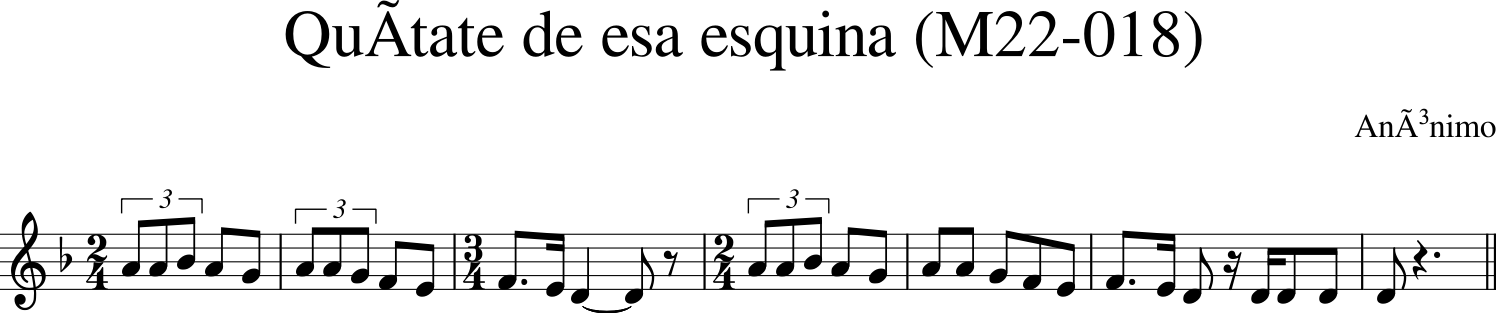

In [6]:
### VER LA PARTITURA RENDERIZADA

s.show()

### 3. Filtrar notas, duraciones e intervalos

In [7]:
### AQUÍ CREAMOS FILTROS PARA NOTAS

pitches = s.recurse().notes

## DURACIONES
durs = [i.quarterLength if isinstance(i.quarterLength, float) else round(float(i.quarterLength), 2) for i in pitches]

## E INTERVALOS

ints = list()
lastpitch = None
for i in pitches:
    if isinstance(i, note.Note) == True:
        if lastpitch is not None:
            now = interval.Interval(lastpitch, i).semitones
            ints.append(now)
        else:
            lastpitch = i
    else:
        pass

In [8]:
### IMPRIMIMOS LOS RESULTADOS DE ESTOS FILTROS

print('Secuencia de alturas: ')
alturas = [i.nameWithOctave for i in pitches]
print(alturas)
print('----')

print('Secuencia de duraciones (unidad de negra): ')
print(durs)

print('----')
print('Secuencia de intervalos (unidad de semitono): ')
print(ints)


Secuencia de alturas: 
['A4', 'A4', 'B-4', 'A4', 'G4', 'A4', 'A4', 'G4', 'F4', 'E4', 'F4', 'E4', 'D4', 'D4', 'A4', 'A4', 'B-4', 'A4', 'G4', 'A4', 'A4', 'G4', 'F4', 'E4', 'F4', 'E4', 'D4', 'D4', 'D4', 'D4', 'D4']
----
Secuencia de duraciones (unidad de negra): 
[0.33, 0.33, 0.33, 0.5, 0.5, 0.33, 0.33, 0.33, 0.5, 0.5, 0.75, 0.25, 1.0, 0.5, 0.33, 0.33, 0.33, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.25, 0.5, 0.25, 0.5, 0.5, 0.5]
----
Secuencia de intervalos (unidad de semitono): 
[0, 1, 0, -2, 0, 0, -2, -4, -5, -4, -5, -7, -7, 0, 0, 1, 0, -2, 0, 0, -2, -4, -5, -4, -5, -7, -7, -7, -7, -7]


In [9]:
### CONTADORES DE OCURRENCIAS

pitches_counter = Counter(alturas)

durs_counter = Counter(durs)

ints_counter = Counter(ints)

def generateHistogram(cnt, tag):
    etiquetas = list(cnt.keys())
    valores = list(cnt.values())

    bar_width = 0.8

    plt.bar(etiquetas, valores, color='skyblue', edgecolor='black', width=bar_width)
    plt.xlabel("Tipos")
    plt.ylabel("Frecuencia")
    plt.title("Histograma de " + tag)

    if all(isinstance(e, (int, float)) for e in etiquetas):
        if any(isinstance(e, float) for e in etiquetas):
            step = 1
            plt.xticks(etiquetas, rotation=45, ha='right')
        else:
            plt.xticks(range(int(min(etiquetas)), int(max(etiquetas)) + 1, 1), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

In [10]:
### HISTOGRAMAS DE FRECUENCIAS

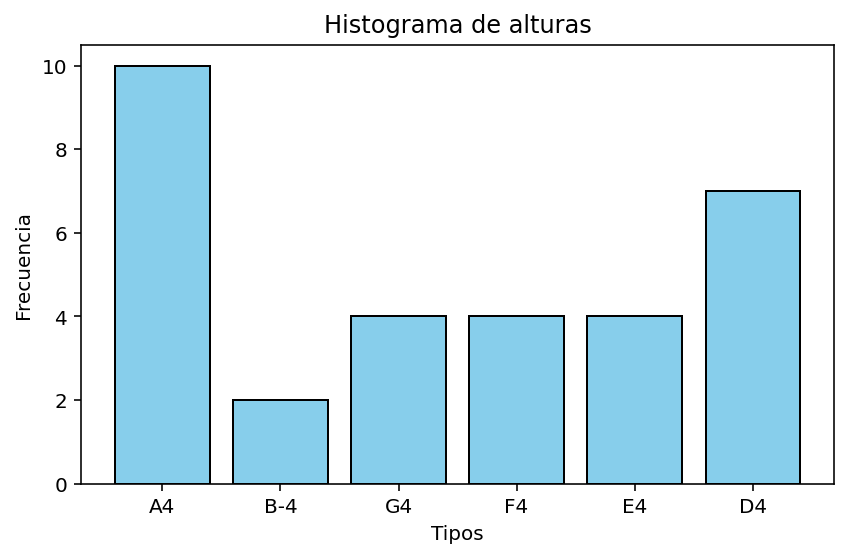

In [11]:
generateHistogram(pitches_counter, 'alturas')

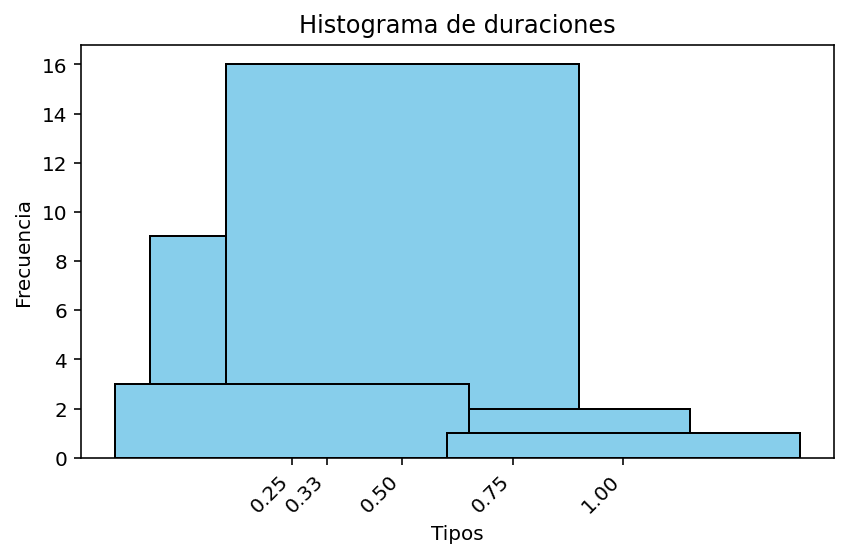

In [12]:
generateHistogram(durs_counter, 'duraciones')

In [13]:
durs_counter

Counter({0.33: 9, 0.5: 16, 0.75: 2, 0.25: 3, 1.0: 1})

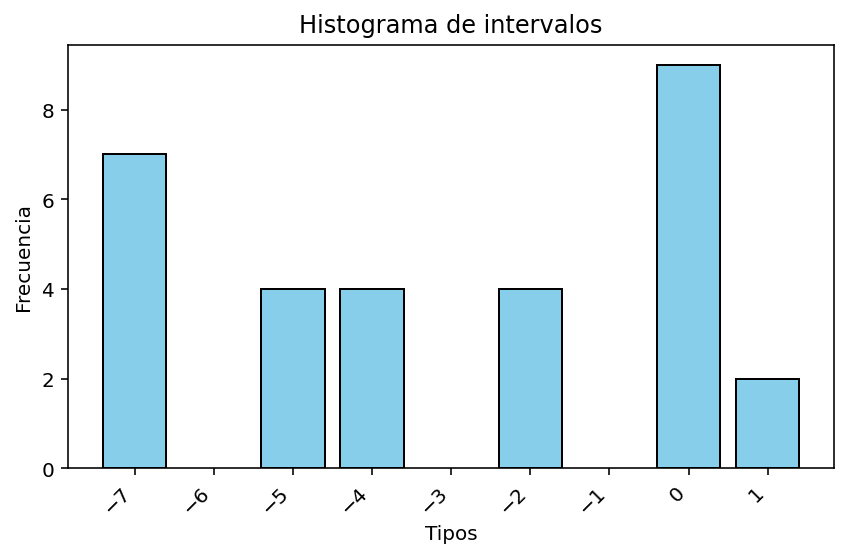

In [14]:
generateHistogram(ints_counter, 'intervalos')

### 4. Procesos de extracción de información analítica (*feature extraction*)

#### Obtener la armadura

In [15]:
ks = armadura(s)
print('La armadura de esta pieza es ' + str(ks))

La armadura de esta pieza es ['B-']


#### Obtener el rango melódico

In [16]:
amb = ambito(s)
amb_2 = amb.split(' - ')
amb_3 = str(interval.Interval(note.Note(amb_2[0]), note.Note(amb_2[1])).semitones)
print('El ambito de esta pieza es de ' + amb_3 + f' semitonos ({amb})')

El ambito de esta pieza es de 8 semitonos (D4 - B-4)


#### Obtener la altura inicial y final

In [17]:
first_pitch = alturas[0]
last_pitch = alturas[-1]

print('La melodía comienza por ' + first_pitch + ' y acaba por ' + last_pitch)

La melodía comienza por A4 y acaba por D4


#### Obtener la altura más repetida

In [18]:
#### Obtener la altura más repetida
tone_stats = get_counter_stats(rec_notas(s, last_pitch), 'notes')
altura_mas_comun = tone_stats[0] ## más repetido
print('La altura mediana es ' + altura_mas_comun)

La altura mediana es A4


#### Obtener la altura mediana

In [19]:
altura_mediana = tone_stats[1] ## mediano repetido
print('La altura mediana es ' + altura_mediana)

La altura mediana es G4


#### Obtener la altura menos repetida

In [20]:
altura_menos_comun = tone_stats[2] ## menos repetido
print('La altura mediana es ' + altura_menos_comun)

La altura mediana es B-4


#### Ratio entre duracion de notas y duración de silencios

In [21]:
ratio_nt_rst = round(note_rest_ratio(s), 2)
print('El rato entre la duración de notas y de silencios es de ' + str(ratio_nt_rst))

El rato entre la duración de notas y de silencios es de 6.33


### 5. Visualización gráfica

#### Gráfico basado en la densidad de notas por compás

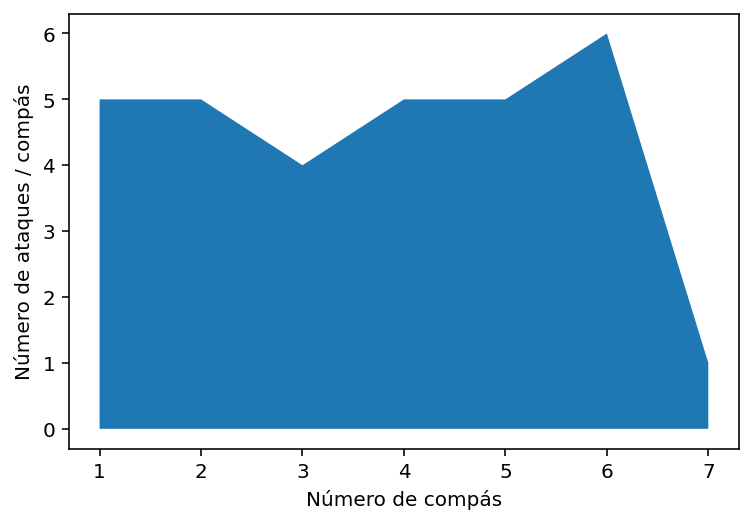

In [22]:
activityPlot(s)

#### Mapa de calor basado en la densidad de notas por compás

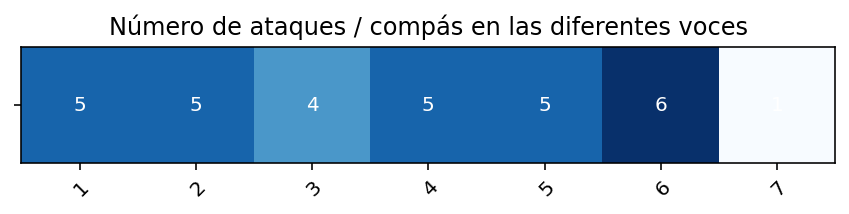

In [25]:
activityHeatMap(s)

#### Gráfico de barras basado en la altura

/media/Datos/Documentos academicos/Publicaciones/Congresos/Webinar_UGR_25/Notebooks-main/visualization.py:79: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


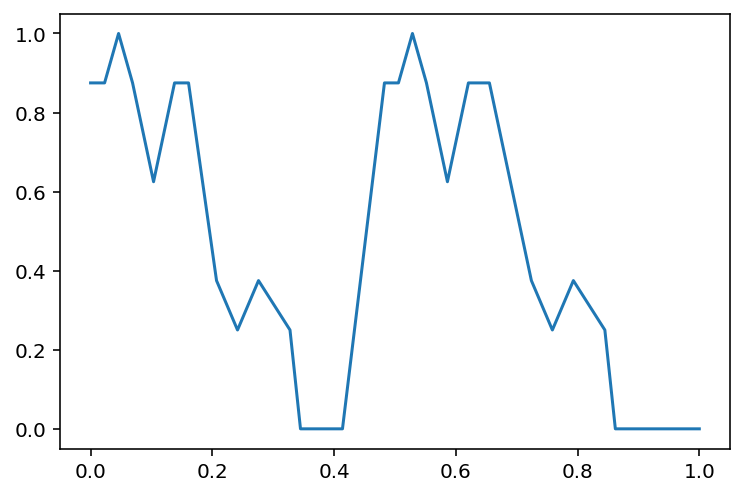

<Figure size 288x288 with 0 Axes>

In [26]:
melodicContour(pitches)